In [16]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


def plot(filename):
    # Connect to the SQLite database
    conn = sqlite3.connect(filename)

    # SQL Query
    query = """
        SELECT 
            AVG(speed_y) as avg_speed_y,
            generation_index 
        FROM 
            ea_optimizer_individual i
        LEFT JOIN 
            float f ON i.float_id = f.id
        LEFT JOIN 
            ea_optimizer_generation g ON g.individual_id = i.individual_id
        GROUP BY 
            generation_index
        ORDER BY 
            generation_index ASC
    """

    # Use pandas to run SQL query and store result in DataFrame
    df = pd.read_sql_query(query, conn)

    # Close the connection
    conn.close()

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot data
    ax.plot(df['generation_index'], df['avg_speed_y'])

    # Set title and labels
    ax.set_title('Average Speed vs. Generation Index')
    ax.set_xlabel('Generation Index')
    ax.set_ylabel('Average Speed')

    # Show the plot
    plt.show()
    return df


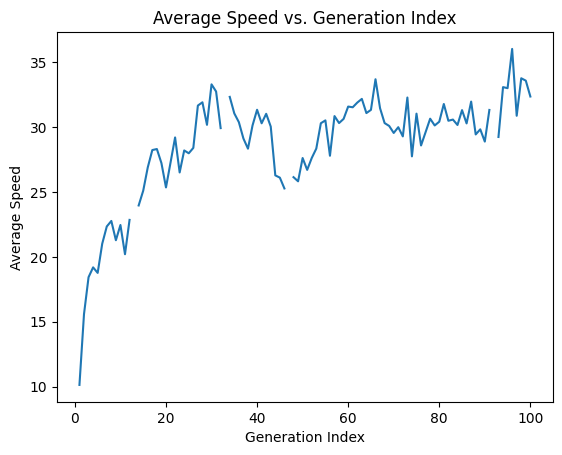

In [17]:
x = plot('first_test_brain.sqlite')


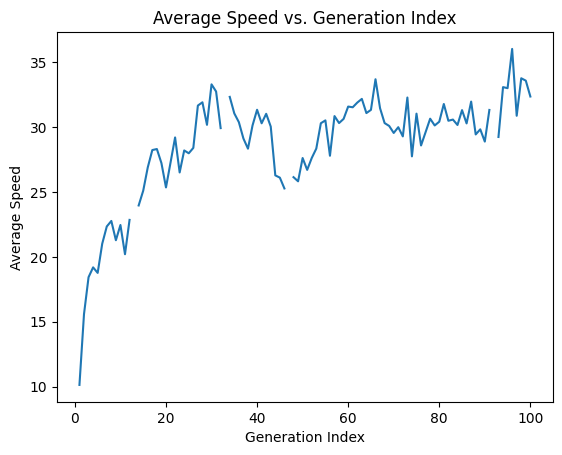

In [9]:
plot('first_test_brain.sqlite')

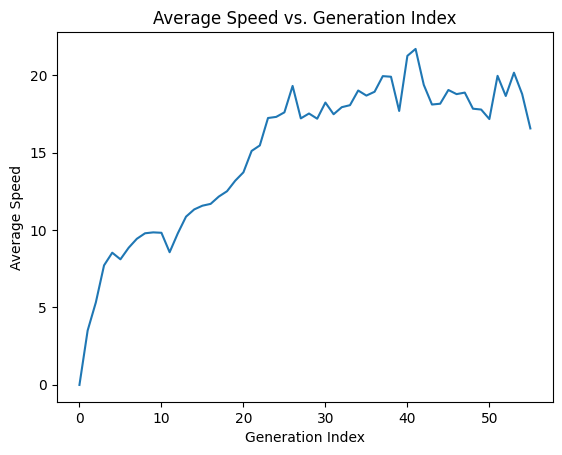

In [11]:
plot('lower_step_freq.sqlite')

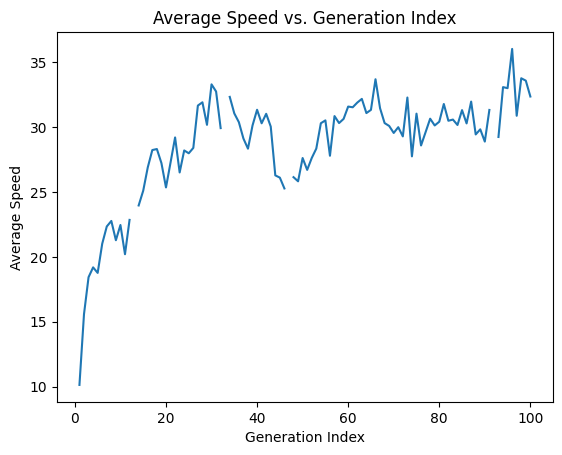

,avg_speed_y,generation_index
0,-inf,NaN
1,-inf,0.0
2,10.128701,1.0
3,15.588158,2.0
4,18.435232,3.0
...,...,...
97,36.036474,96.0
98,30.882013,97.0
99,33.773739,98.0
100,33.589491,99.0


In [19]:
plot('step_diff_test_brain.sqlite')